In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

In [2]:
path =os.path.join('athlete_events.csv')
df = pd.read_csv(path)

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
partial_df = df[df['games'].isin(['2012 Summer', '2008 Summer', '2016 Summer'])].reset_index(drop=True)

In [6]:
partial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40210 entries, 0 to 40209
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      40210 non-null  int64  
 1   name    40210 non-null  object 
 2   sex     40210 non-null  object 
 3   age     40208 non-null  float64
 4   height  39715 non-null  float64
 5   weight  39468 non-null  float64
 6   team    40210 non-null  object 
 7   noc     40210 non-null  object 
 8   games   40210 non-null  object 
 9   year    40210 non-null  int64  
 10  season  40210 non-null  object 
 11  city    40210 non-null  object 
 12  sport   40210 non-null  object 
 13  event   40210 non-null  object 
 14  medal   6012 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.6+ MB


In [7]:
# Same athletes may participate in different years, but counting same athletes in same year repetitively(it may stem from different events in sports) 
# won't be convenient approach

In [8]:
duplicated_athletes = partial_df[partial_df.duplicated(subset=['year','id'])]

In [9]:
len(duplicated_athletes)

7615

In [10]:
duplicated_athletes.head()

id               name sex   age  height  weight   team  noc        games  \
7   51  Nstor Abad Sanjun   M  23.0   167.0    64.0  Spain  ESP  2016 Summer   
8   51  Nstor Abad Sanjun   M  23.0   167.0    64.0  Spain  ESP  2016 Summer   
9   51  Nstor Abad Sanjun   M  23.0   167.0    64.0  Spain  ESP  2016 Summer   
10  51  Nstor Abad Sanjun   M  23.0   167.0    64.0  Spain  ESP  2016 Summer   
11  51  Nstor Abad Sanjun   M  23.0   167.0    64.0  Spain  ESP  2016 Summer   

    year  season            city       sport  \
7   2016  Summer  Rio de Janeiro  Gymnastics   
8   2016  Summer  Rio de Janeiro  Gymnastics   
9   2016  Summer  Rio de Janeiro  Gymnastics   
10  2016  Summer  Rio de Janeiro  Gymnastics   
11  2016  Summer  Rio de Janeiro  Gymnastics   

                               event medal  
7    Gymnastics Men's Floor Exercise   NaN  
8     Gymnastics Men's Parallel Bars   NaN  
9    Gymnastics Men's Horizontal Bar   NaN  
10            Gymnastics Men's Rings   NaN  
11  Gymnastics Men's Pommelled Horse   NaN

In [11]:
unique_df = partial_df.drop_duplicates(subset=['year','id'])

In [12]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32595 entries, 0 to 40209
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      32595 non-null  int64  
 1   name    32595 non-null  object 
 2   sex     32595 non-null  object 
 3   age     32594 non-null  float64
 4   height  32137 non-null  float64
 5   weight  31978 non-null  float64
 6   team    32595 non-null  object 
 7   noc     32595 non-null  object 
 8   games   32595 non-null  object 
 9   year    32595 non-null  int64  
 10  season  32595 non-null  object 
 11  city    32595 non-null  object 
 12  sport   32595 non-null  object 
 13  event   32595 non-null  object 
 14  medal   4744 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.0+ MB


In [13]:
sports = set(unique_df['sport'].unique())

In [14]:
len(sports)

36

In [15]:
unique_df_male = unique_df[unique_df['sex'].isin(['M'])].reset_index(drop=True)
unique_df_female = unique_df[unique_df['sex'].isin(['F'])].reset_index(drop=True)

In [16]:
unique_df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18298 entries, 0 to 18297
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      18298 non-null  int64  
 1   name    18298 non-null  object 
 2   sex     18298 non-null  object 
 3   age     18298 non-null  float64
 4   height  17995 non-null  float64
 5   weight  17926 non-null  float64
 6   team    18298 non-null  object 
 7   noc     18298 non-null  object 
 8   games   18298 non-null  object 
 9   year    18298 non-null  int64  
 10  season  18298 non-null  object 
 11  city    18298 non-null  object 
 12  sport   18298 non-null  object 
 13  event   18298 non-null  object 
 14  medal   2561 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.1+ MB


In [17]:
unique_df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14297 entries, 0 to 14296
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14297 non-null  int64  
 1   name    14297 non-null  object 
 2   sex     14297 non-null  object 
 3   age     14296 non-null  float64
 4   height  14142 non-null  float64
 5   weight  14052 non-null  float64
 6   team    14297 non-null  object 
 7   noc     14297 non-null  object 
 8   games   14297 non-null  object 
 9   year    14297 non-null  int64  
 10  season  14297 non-null  object 
 11  city    14297 non-null  object 
 12  sport   14297 non-null  object 
 13  event   14297 non-null  object 
 14  medal   2183 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.6+ MB


In [18]:
sportsmale = set(unique_df_male['sport'].unique())

In [19]:
len(sportsmale)

33

In [20]:
sportsfemale = set(unique_df_female['sport'].unique())

In [21]:
len(sportsfemale)

35

In [22]:
female_difference = sports.symmetric_difference(sportsfemale)
female_difference

{'Baseball'}

In [23]:
male_difference= sports.symmetric_difference(sportsmale)
male_difference

{'Rhythmic Gymnastics', 'Softball', 'Synchronized Swimming'}

In [83]:
# We will make comparisons between male and female athletes. So we need to work with common sports.

In [25]:
mask = ~unique_df_female['sport'].isin(['Rhythmic Gymnastics', 'Softball', 'Synchronized Swimming'])

In [26]:
unique_df_female = unique_df_female[mask]

In [27]:
control = unique_df_female['sport'].unique()
len(control)

32

In [28]:
mask2 = ~unique_df_male['sport'].isin(['Baseball'])

In [29]:
unique_df_male = unique_df_male[mask2]

In [30]:
control2 = unique_df_male['sport'].unique()
len(control2)

32

In [31]:
unique_df_female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13586 entries, 0 to 14296
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      13586 non-null  int64  
 1   name    13586 non-null  object 
 2   sex     13586 non-null  object 
 3   age     13585 non-null  float64
 4   height  13433 non-null  float64
 5   weight  13371 non-null  float64
 6   team    13586 non-null  object 
 7   noc     13586 non-null  object 
 8   games   13586 non-null  object 
 9   year    13586 non-null  int64  
 10  season  13586 non-null  object 
 11  city    13586 non-null  object 
 12  sport   13586 non-null  object 
 13  event   13586 non-null  object 
 14  medal   2000 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.7+ MB


In [32]:
unique_df_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18107 entries, 0 to 18297
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      18107 non-null  int64  
 1   name    18107 non-null  object 
 2   sex     18107 non-null  object 
 3   age     18107 non-null  float64
 4   height  17805 non-null  float64
 5   weight  17736 non-null  float64
 6   team    18107 non-null  object 
 7   noc     18107 non-null  object 
 8   games   18107 non-null  object 
 9   year    18107 non-null  int64  
 10  season  18107 non-null  object 
 11  city    18107 non-null  object 
 12  sport   18107 non-null  object 
 13  event   18107 non-null  object 
 14  medal   2489 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.2+ MB


In [33]:
# No need for handling(imputations or omissions) age, height and weight null values, cause we will work with averages

In [34]:
unique_df_malesports = unique_df_male.groupby('sport')
unique_df_femalesports = unique_df_female.groupby('sport')

In [35]:
male_count_by_sport = unique_df_malesports.agg({
  'id':'count'

}).rename(columns={'id': 'Male'})
male_count_by_sport

Male
sport                  
Archery             192
Athletics          3355
Badminton           259
Basketball          429
Beach Volleyball    144
Boxing              777
Canoeing            674
Cycling            1003
Diving              203
Equestrianism       367
Fencing             360
Football            811
Golf                 60
Gymnastics          294
Handball            525
Hockey              588
Judo                698
Modern Pentathlon   108
Rowing             1048
Rugby Sevens        151
Sailing             715
Shooting            715
Swimming           1554
Table Tennis        258
Taekwondo           189
Tennis              286
Trampolining         48
Triathlon           165
Volleyball          428
Water Polo          462
Weightlifting       467
Wrestling           774

In [36]:
female_count_by_sport = unique_df_femalesports.agg({
  'id':'count'

}).rename(columns={'id': 'Female'})
female_count_by_sport

Female
sport                    
Archery               192
Athletics            3049
Badminton             258
Basketball            426
Beach Volleyball      144
Boxing                 72
Canoeing              318
Cycling               519
Diving                209
Equestrianism         225
Fencing               363
Football              598
Golf                   60
Gymnastics            293
Handball              518
Hockey                576
Judo                  461
Modern Pentathlon     108
Rowing                602
Rugby Sevens          148
Sailing               444
Shooting              455
Swimming             1341
Table Tennis          259
Taekwondo             191
Tennis                263
Trampolining           48
Triathlon             165
Volleyball            425
Water Polo            309
Weightlifting         293
Wrestling             254

In [37]:
athletes_count  = pd.concat([male_count_by_sport, female_count_by_sport], axis=1)
athletes_count

Male  Female
sport                          
Archery             192     192
Athletics          3355    3049
Badminton           259     258
Basketball          429     426
Beach Volleyball    144     144
Boxing              777      72
Canoeing            674     318
Cycling            1003     519
Diving              203     209
Equestrianism       367     225
Fencing             360     363
Football            811     598
Golf                 60      60
Gymnastics          294     293
Handball            525     518
Hockey              588     576
Judo                698     461
Modern Pentathlon   108     108
Rowing             1048     602
Rugby Sevens        151     148
Sailing             715     444
Shooting            715     455
Swimming           1554    1341
Table Tennis        258     259
Taekwondo           189     191
Tennis              286     263
Trampolining         48      48
Triathlon           165     165
Volleyball          428     425
Water Polo          462     309
Weightlifting       467     293
Wrestling           774     254

In [38]:
athletes_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Archery to Wrestling
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Male    32 non-null     int64
 1   Female  32 non-null     int64
dtypes: int64(2)
memory usage: 768.0+ bytes


In [39]:
total_sum = athletes_count.sum().sum()
total_sum

31693

In [40]:
# Total Athlete counts in dataset

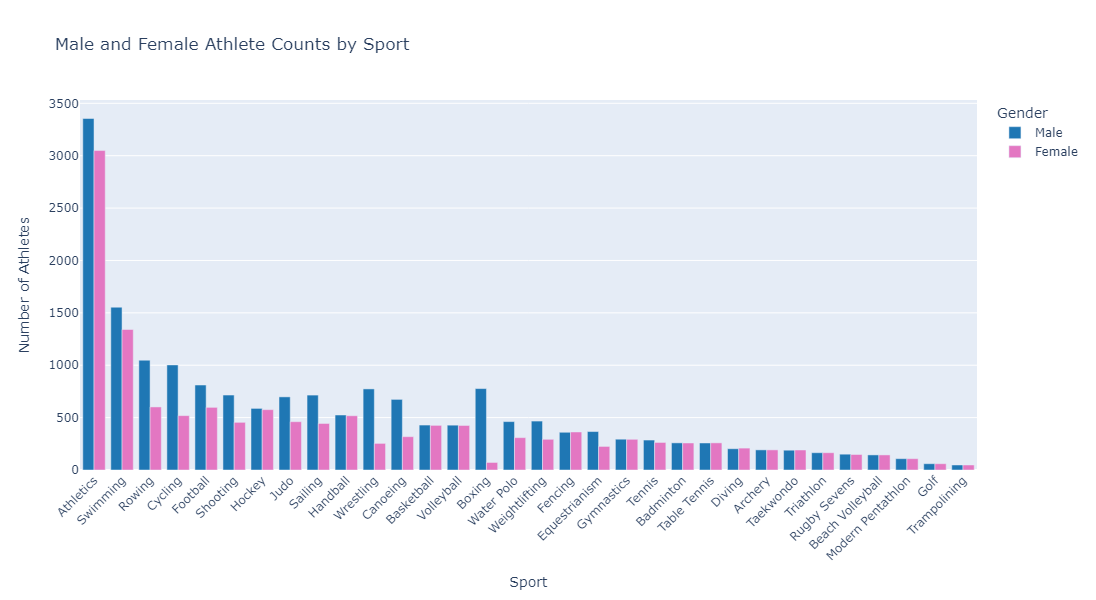

In [41]:
plot_data = athletes_count.reset_index()

plot_data['Total'] = plot_data['Male'] + plot_data['Female']
plot_data = plot_data.sort_values('Total', ascending=False)


fig = go.Figure()


fig.add_trace(go.Bar(
    x=plot_data['sport'],
    y=plot_data['Male'],
    name='Male',
    marker_color='#1f77b4'
))


fig.add_trace(go.Bar(
    x=plot_data['sport'],
    y=plot_data['Female'],
    name='Female',
    marker_color='#e377c2'
))


fig.update_layout(
    title='Male and Female Athlete Counts by Sport',
    xaxis_title='Sport',
    yaxis_title='Number of Athletes',
    barmode='group',
    height=600,
    width=1000,
    legend_title='Gender',
    xaxis_tickangle=-45
)


fig.show()

In [42]:
female_by_year_and_sport = unique_df_female.groupby(['year', 'sport'])

In [43]:
female_count_by_year_and_sport = female_by_year_and_sport.agg({
  'id':'count'

}).rename(columns={'id': 'Female'})
female_count_by_year_and_sport

Female
year sport                    
2008 Archery                64
     Athletics             974
     Badminton              86
     Basketball            143
     Beach Volleyball       48
     Canoeing               95
     Cycling               147
     Diving                 73
     Equestrianism          73
     Fencing               116
     Football              195
     Gymnastics             98
     Handball              171
     Hockey                191
     Judo                  156
     Modern Pentathlon      36
     Rowing                191
     Sailing               139
     Shooting              145
     Swimming              453
     Table Tennis           85
     Taekwondo              63
     Tennis                 83
     Trampolining           16
     Triathlon              55
     Volleyball            140
     Water Polo            103
     Weightlifting          87
     Wrestling              66
2012 Archery                64
     Athletics             991
     Badminton              86
     Basketball            143
     Beach Volleyball       48
     Boxing                 36
     Canoeing              111
     Cycling               180
     Diving                 68
     Equestrianism          77
     Fencing               123
     Football              200
     Gymnastics             97
     Handball              171
     Hockey                191
     Judo                  153
     Modern Pentathlon      36
     Rowing                196
     Sailing               142
     Shooting              159
     Swimming              450
     Table Tennis           88
     Taekwondo              64
     Tennis                 89
     Trampolining           16
     Triathlon              55
     Volleyball            143
     Water Polo            102
     Weightlifting         103
     Wrestling              76
2016 Archery                64
     Athletics            1084
     Badminton              86
     Basketball            140
     Beach Volleyball       48
     Boxing                 36
     Canoeing              112
     Cycling               192
     Diving                 68
     Equestrianism          75
     Fencing               124
     Football              203
     Golf                   60
     Gymnastics             98
     Handball              176
     Hockey                194
     Judo                  152
     Modern Pentathlon      36
     Rowing                215
     Rugby Sevens          148
     Sailing               163
     Shooting              151
     Swimming              438
     Table Tennis           86
     Taekwondo              64
     Tennis                 91
     Trampolining           16
     Triathlon              55
     Volleyball            142
     Water Polo            104
     Weightlifting         103
     Wrestling             112

In [44]:
male_by_year_and_sport = unique_df_male.groupby(['year', 'sport'])

In [45]:
male_count_by_year_and_sport = male_by_year_and_sport.agg({
  'id':'count'

}).rename(columns={'id': 'Male'})
male_count_by_year_and_sport

Male
year sport                  
2008 Archery              64
     Athletics          1082
     Badminton            87
     Basketball          144
     Beach Volleyball     48
     Boxing              283
     Canoeing            235
     Cycling             361
     Diving               67
     Equestrianism       120
     Fencing             118
     Football            274
     Gymnastics           98
     Handball            172
     Hockey              196
     Judo                230
     Modern Pentathlon    36
     Rowing              364
     Sailing             261
     Shooting            245
     Swimming            569
     Table Tennis         86
     Taekwondo            63
     Tennis               86
     Trampolining         16
     Triathlon            55
     Volleyball          143
     Water Polo          153
     Weightlifting       166
     Wrestling           277
2012 Archery              64
     Athletics          1088
     Badminton            86
     Basketball          144
     Beach Volleyball     48
     Boxing              247
     Canoeing            221
     Cycling             321
     Diving               68
     Equestrianism       122
     Fencing             121
     Football            267
     Gymnastics           98
     Handball            176
     Hockey              196
     Judo                231
     Modern Pentathlon    36
     Rowing              353
     Sailing             237
     Shooting            231
     Swimming            481
     Table Tennis         86
     Taekwondo            64
     Tennis               95
     Trampolining         16
     Triathlon            55
     Volleyball          144
     Water Polo          155
     Weightlifting       149
     Wrestling           263
2016 Archery              64
     Athletics          1185
     Badminton            86
     Basketball          141
     Beach Volleyball     48
     Boxing              247
     Canoeing            218
     Cycling             321
     Diving               68
     Equestrianism       125
     Fencing             121
     Football            270
     Golf                 60
     Gymnastics           98
     Handball            177
     Hockey              196
     Judo                237
     Modern Pentathlon    36
     Rowing              331
     Rugby Sevens        151
     Sailing             217
     Shooting            239
     Swimming            504
     Table Tennis         86
     Taekwondo            62
     Tennis              105
     Trampolining         16
     Triathlon            55
     Volleyball          141
     Water Polo          154
     Weightlifting       152
     Wrestling           234

In [46]:
athletes_count_by_year_and_sport = pd.concat([male_count_by_year_and_sport, female_count_by_year_and_sport], axis=1)
athletes_count_by_year_and_sport

Male  Female
year sport                          
2008 Archery              64    64.0
     Athletics          1082   974.0
     Badminton            87    86.0
     Basketball          144   143.0
     Beach Volleyball     48    48.0
     Boxing              283     NaN
     Canoeing            235    95.0
     Cycling             361   147.0
     Diving               67    73.0
     Equestrianism       120    73.0
     Fencing             118   116.0
     Football            274   195.0
     Gymnastics           98    98.0
     Handball            172   171.0
     Hockey              196   191.0
     Judo                230   156.0
     Modern Pentathlon    36    36.0
     Rowing              364   191.0
     Sailing             261   139.0
     Shooting            245   145.0
     Swimming            569   453.0
     Table Tennis         86    85.0
     Taekwondo            63    63.0
     Tennis               86    83.0
     Trampolining         16    16.0
     Triathlon            55    55.0
     Volleyball          143   140.0
     Water Polo          153   103.0
     Weightlifting       166    87.0
     Wrestling           277    66.0
2012 Archery              64    64.0
     Athletics          1088   991.0
     Badminton            86    86.0
     Basketball          144   143.0
     Beach Volleyball     48    48.0
     Boxing              247    36.0
     Canoeing            221   111.0
     Cycling             321   180.0
     Diving               68    68.0
     Equestrianism       122    77.0
     Fencing             121   123.0
     Football            267   200.0
     Gymnastics           98    97.0
     Handball            176   171.0
     Hockey              196   191.0
     Judo                231   153.0
     Modern Pentathlon    36    36.0
     Rowing              353   196.0
     Sailing             237   142.0
     Shooting            231   159.0
     Swimming            481   450.0
     Table Tennis         86    88.0
     Taekwondo            64    64.0
     Tennis               95    89.0
     Trampolining         16    16.0
     Triathlon            55    55.0
     Volleyball          144   143.0
     Water Polo          155   102.0
     Weightlifting       149   103.0
     Wrestling           263    76.0
2016 Archery              64    64.0
     Athletics          1185  1084.0
     Badminton            86    86.0
     Basketball          141   140.0
     Beach Volleyball     48    48.0
     Boxing              247    36.0
     Canoeing            218   112.0
     Cycling             321   192.0
     Diving               68    68.0
     Equestrianism       125    75.0
     Fencing             121   124.0
     Football            270   203.0
     Golf                 60    60.0
     Gymnastics           98    98.0
     Handball            177   176.0
     Hockey              196   194.0
     Judo                237   152.0
     Modern Pentathlon    36    36.0
     Rowing              331   215.0
     Rugby Sevens        151   148.0
     Sailing             217   163.0
     Shooting            239   151.0
     Swimming            504   438.0
     Table Tennis         86    86.0
     Taekwondo            62    64.0
     Tennis              105    91.0
     Trampolining         16    16.0
     Triathlon            55    55.0
     Volleyball          141   142.0
     Water Polo          154   104.0
     Weightlifting       152   103.0
     Wrestling           234   112.0

In [47]:
athletes_count_by_year_and_sport.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 92 entries, (2008, 'Archery') to (2016, 'Wrestling')
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Male    92 non-null     int64  
 1   Female  91 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 4.0+ KB


In [48]:
# Total Athlete counts in dataset by year

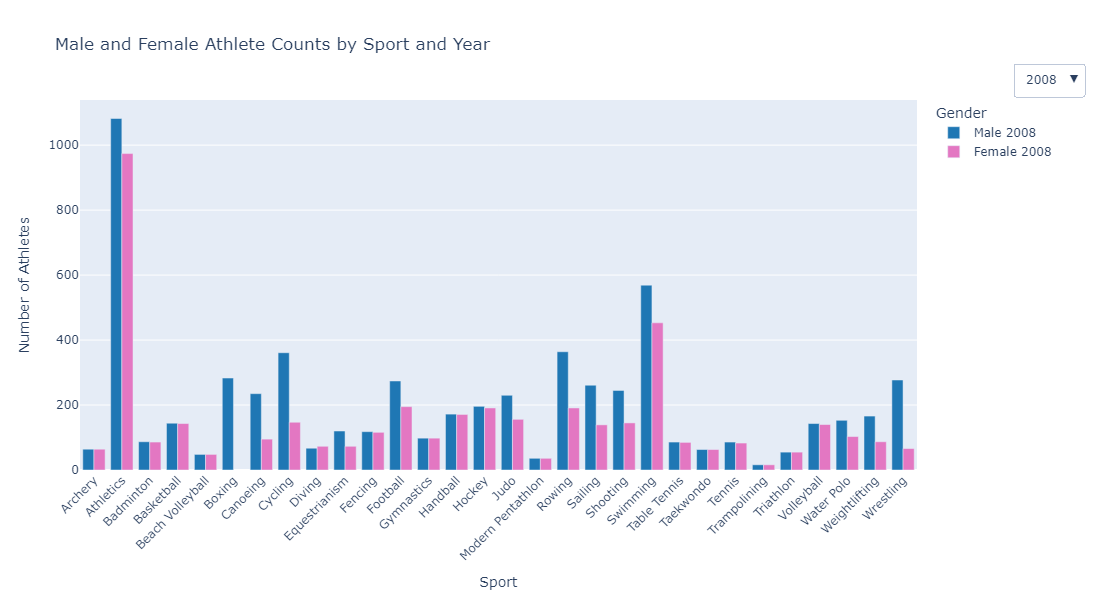

In [49]:
plot_data = athletes_count_by_year_and_sport.reset_index()
years = plot_data['year'].unique()
sports = plot_data['sport'].unique()

fig = go.Figure()


for year in years:
    year_data = plot_data[plot_data['year'] == year].sort_values('sport')
    
    fig.add_trace(
        go.Bar(x=year_data['sport'], y=year_data['Male'], name=f'Male {year}', visible=False,  marker_color='#1f77b4')
         
    )
    
    fig.add_trace(
        go.Bar(x=year_data['sport'], y=year_data['Female'], name=f'Female {year}', visible=False,  marker_color='#e377c2')
    )


fig.data[0].visible = True
fig.data[1].visible = True


dropdown_buttons = []
for i, year in enumerate(years):
    dropdown_buttons.append(
        dict(
            method='update',
            label=str(year),
            args=[{'visible': [idx == i*2 or idx == i*2+1 for idx in range(len(fig.data))]},
                  {'title': f'Male and Female Athlete Counts by Sport in {year}'}]
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=1.2,
            y=1.1,
            xanchor='right',
            yanchor='top'
        )
    ],
    barmode='group' 
)

fig.update_layout(
    height=600, 
    width=1000, 
    title_text="Male and Female Athlete Counts by Sport and Year",
    xaxis_title="Sport",
    yaxis_title="Number of Athletes",
    legend_title="Gender",
    xaxis_tickangle=-45
)


fig.show()

In [84]:
# Preparation of dataset for model

In [51]:
unique_male_averages = unique_df_malesports.agg({
    'age': 'mean',
    'height': 'mean',
    'weight':'mean'
})
unique_male_averages

age      height     weight
sport                                              
Archery            26.458333  179.539267  80.267016
Athletics          26.339791  181.462696  76.159914
Badminton          27.258687  179.486486  74.698039
Basketball         27.226107  200.405594  99.324706
Beach Volleyball   30.041667  194.569444  89.496503
Boxing             24.072072  175.275862  67.088825
Canoeing           26.442136  182.422619  82.150074
Cycling            26.890329  179.729839  73.247475
Diving             23.295567  171.118227  66.440594
Equestrianism      37.934605  178.603878  72.750696
Fencing            27.158333  183.480226  78.668571
Football           22.272503  179.909877  74.515803
Golf               32.166667  179.600000  79.245283
Gymnastics         24.506803  166.972603  62.849123
Handball           28.363810  191.329480  94.229287
Hockey             26.532313  179.416084  76.807692
Judo               26.068768  177.980741  85.283115
Modern Pentathlon  26.296296  182.537037  74.222222
Rowing             27.001908  189.911623  86.576369
Rugby Sevens       25.980132  182.834437  91.006623
Sailing            28.718881  181.875000  78.755994
Shooting           33.166434  177.783593  81.162857
Swimming           23.008366  185.991396  79.938411
Table Tennis       28.414729  177.765625  72.796875
Taekwondo          24.650794  183.550265  74.550265
Tennis             28.332168  185.930070  80.283217
Trampolining       24.687500  170.833333  64.021739
Triathlon          27.884848  180.303030  68.323171
Volleyball         27.427570  197.271028  89.757009
Water Polo         27.816017  191.820346  95.406926
Weightlifting      24.948608  170.316594  86.157725
Wrestling          26.329457  175.289062  81.786086

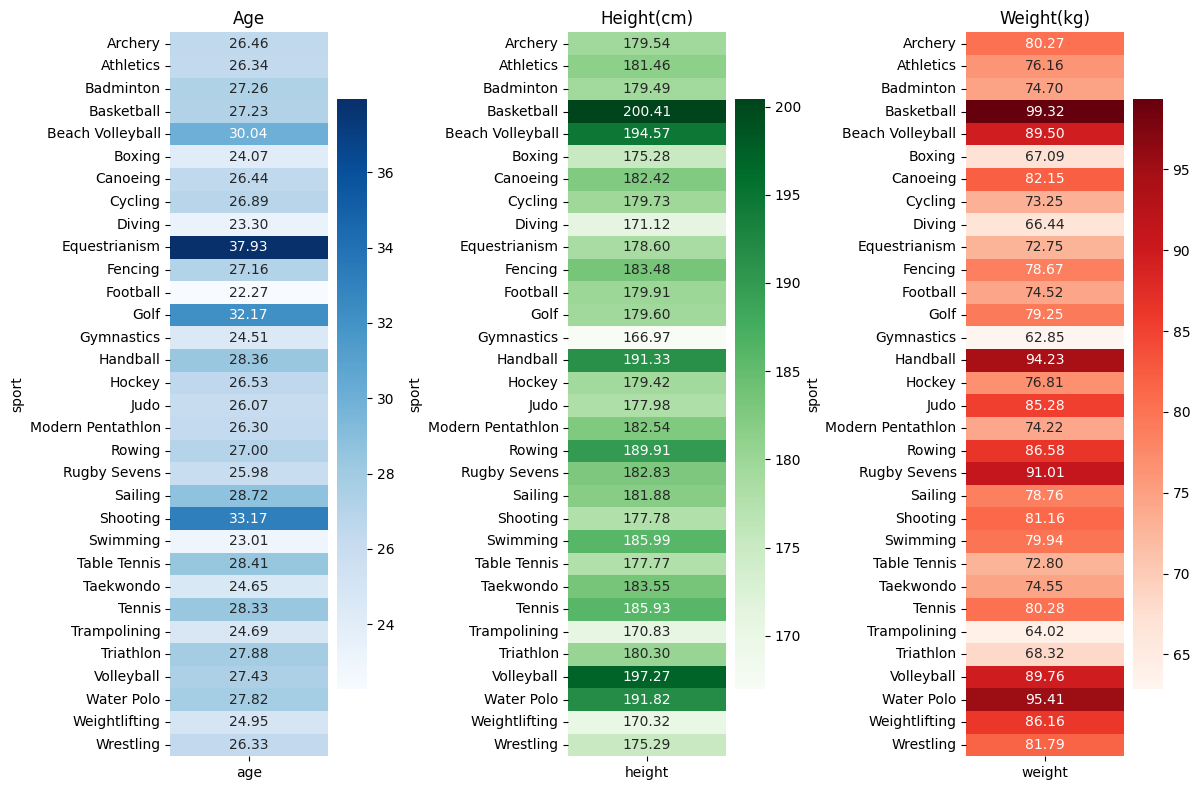

In [52]:
# Male Averages
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

sns.heatmap(unique_male_averages[['age']], cmap='Blues', fmt=".2f", ax=axes[0], cbar=True, annot=True)
axes[0].set_title('Age')

sns.heatmap(unique_male_averages[['height']], cmap='Greens', fmt=".2f", ax=axes[1], cbar=True, annot=True)
axes[1].set_title('Height(cm)')

sns.heatmap(unique_male_averages[['weight']], cmap='Reds', fmt=".2f", ax=axes[2], cbar=True, annot=True)
axes[2].set_title('Weight(kg)')

plt.tight_layout()
plt.show()

In [53]:
unique_female_averages = unique_df_femalesports.agg({
    'age': 'mean',
    'height': 'mean',
    'weight':'mean'
})
unique_female_averages

age      height     weight
sport                                              
Archery            25.838542  166.952632  62.831579
Athletics          26.226304  169.718130  60.752355
Badminton          25.290698  168.665370  61.686508
Basketball         26.711268  183.535211  75.345411
Beach Volleyball   28.090278  179.854167  69.215278
Boxing             26.638889  168.800000  61.836066
Canoeing           26.323899  170.055016  65.516234
Cycling            26.922929  167.723938  59.864078
Diving             22.708134  161.177885  54.360577
Equestrianism      35.995556  168.116071  59.238739
Fencing            26.415978  170.671271  61.961326
Football           25.058528  167.550167  61.167504
Golf               26.883333  168.733333  63.436364
Gymnastics         19.421233  154.786207  47.329710
Handball           26.986486  176.208897  70.156436
Hockey             25.713542  166.560764  60.854167
Judo               26.010846  166.637969  67.191721
Modern Pentathlon  24.953704  170.157407  58.259259
Rowing             26.704319  177.818030  70.038397
Rugby Sevens       26.114865  167.636986  66.628378
Sailing            26.824324  169.727477  63.480638
Shooting           29.518681  165.167770  62.802661
Swimming           21.457122  172.737282  62.626712
Table Tennis       26.942085  165.642857  58.276680
Taekwondo          23.324607  171.451087  60.976064
Tennis             25.444867  173.368821  63.342205
Trampolining       25.687500  162.229167  52.791667
Triathlon          27.709091  167.212121  54.262195
Volleyball         26.131765  183.141176  70.265882
Water Polo         24.770227  176.103560  71.119741
Weightlifting      23.972696  160.298969  67.689420
Wrestling          25.393701  164.248031  60.814229

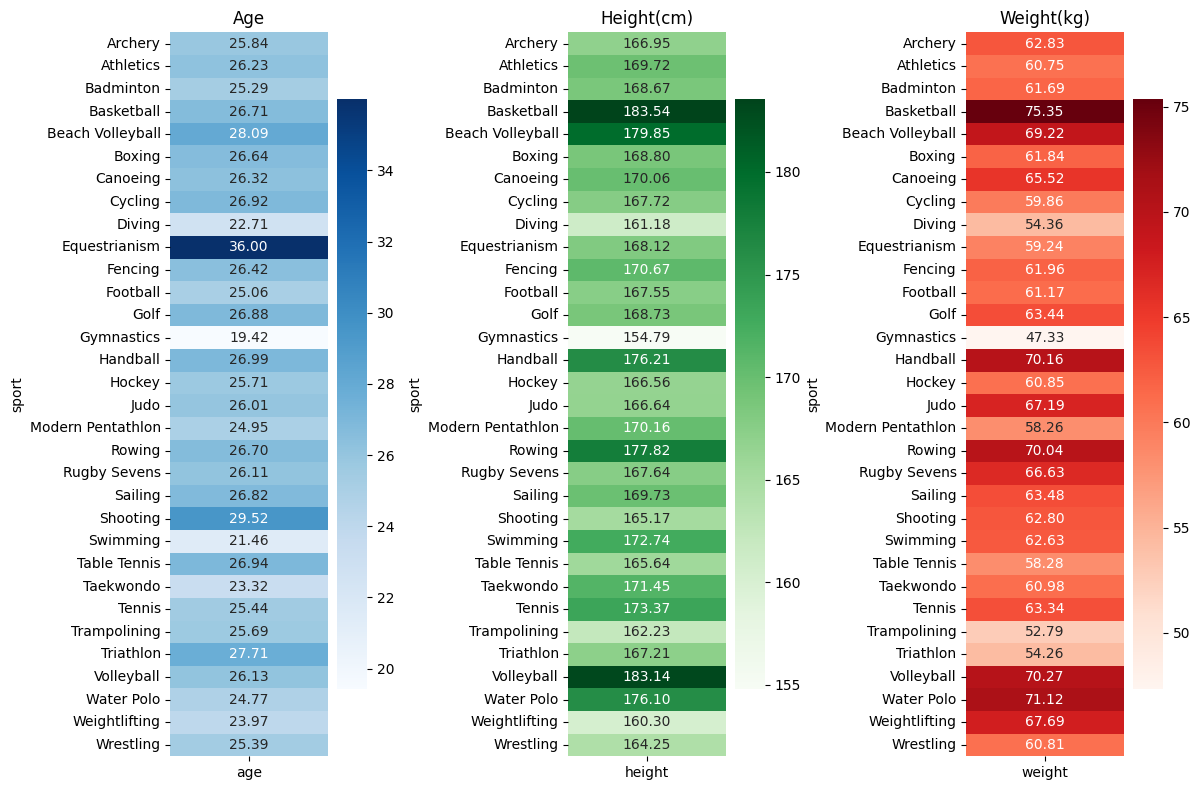

In [54]:
# Female Averages

fig, axes = plt.subplots(1, 3, figsize=(12, 8))

sns.heatmap(unique_female_averages[['age']], cmap='Blues', fmt=".2f", ax=axes[0], cbar=True, annot=True)
axes[0].set_title('Age')

sns.heatmap(unique_female_averages[['height']], cmap='Greens', fmt=".2f", ax=axes[1], cbar=True, annot=True)
axes[1].set_title('Height(cm)')

sns.heatmap(unique_female_averages[['weight']], cmap='Reds', fmt=".2f", ax=axes[2], cbar=True, annot=True)
axes[2].set_title('Weight(kg)')

plt.tight_layout()
plt.show()

In [55]:
unique_male_averages['BMI']=(unique_male_averages['weight'])/(unique_male_averages['height']**2)*10000
unique_female_averages['BMI']=(unique_female_averages['weight'])/(unique_female_averages['height']**2)*10000

In [56]:
unique_male_averages

age      height     weight        BMI
sport                                                         
Archery            26.458333  179.539267  80.267016  24.901082
Athletics          26.339791  181.462696  76.159914  23.128727
Badminton          27.258687  179.486486  74.698039  23.187060
Basketball         27.226107  200.405594  99.324706  24.730768
Beach Volleyball   30.041667  194.569444  89.496503  23.640507
Boxing             24.072072  175.275862  67.088825  21.837653
Canoeing           26.442136  182.422619  82.150074  24.685992
Cycling            26.890329  179.729839  73.247475  22.675261
Diving             23.295567  171.118227  66.440594  22.690338
Equestrianism      37.934605  178.603878  72.750696  22.806329
Fencing            27.158333  183.480226  78.668571  23.368064
Football           22.272503  179.909877  74.515803  23.021752
Golf               32.166667  179.600000  79.245283  24.567488
Gymnastics         24.506803  166.972603  62.849123  22.542848
Handball           28.363810  191.329480  94.229287  25.740805
Hockey             26.532313  179.416084  76.807692  23.860634
Judo               26.068768  177.980741  85.283115  26.922602
Modern Pentathlon  26.296296  182.537037  74.222222  22.275731
Rowing             27.001908  189.911623  86.576369  24.004700
Rugby Sevens       25.980132  182.834437  91.006623  27.224317
Sailing            28.718881  181.875000  78.755994  23.808805
Shooting           33.166434  177.783593  81.162857  25.678755
Swimming           23.008366  185.991396  79.938411  23.108396
Table Tennis       28.414729  177.765625  72.796875  23.036536
Taekwondo          24.650794  183.550265  74.550265  22.127847
Tennis             28.332168  185.930070  80.283217  23.223384
Trampolining       24.687500  170.833333  64.021739  21.937253
Triathlon          27.884848  180.303030  68.323171  21.016576
Volleyball         27.427570  197.271028  89.757009  23.064379
Water Polo         27.816017  191.820346  95.406926  25.929286
Weightlifting      24.948608  170.316594  86.157725  29.701631
Wrestling          26.329457  175.289062  81.786086  26.617655

In [57]:
comparison = pd.concat([unique_male_averages, unique_female_averages], axis=1)
comparison.columns = pd.MultiIndex.from_tuples([
     ('Male', 'Age'), ('Male', 'Height'), ('Male', 'Weight'), ('Male', 'BMI'),
     ('Female', 'Age'), ('Female', 'Height'), ('Female', 'Weight'), ('Female', 'BMI')
])

comparison

Male                                       Female  \
                         Age      Height     Weight        BMI        Age   
sport                                                                       
Archery            26.458333  179.539267  80.267016  24.901082  25.838542   
Athletics          26.339791  181.462696  76.159914  23.128727  26.226304   
Badminton          27.258687  179.486486  74.698039  23.187060  25.290698   
Basketball         27.226107  200.405594  99.324706  24.730768  26.711268   
Beach Volleyball   30.041667  194.569444  89.496503  23.640507  28.090278   
Boxing             24.072072  175.275862  67.088825  21.837653  26.638889   
Canoeing           26.442136  182.422619  82.150074  24.685992  26.323899   
Cycling            26.890329  179.729839  73.247475  22.675261  26.922929   
Diving             23.295567  171.118227  66.440594  22.690338  22.708134   
Equestrianism      37.934605  178.603878  72.750696  22.806329  35.995556   
Fencing            27.158333  183.480226  78.668571  23.368064  26.415978   
Football           22.272503  179.909877  74.515803  23.021752  25.058528   
Golf               32.166667  179.600000  79.245283  24.567488  26.883333   
Gymnastics         24.506803  166.972603  62.849123  22.542848  19.421233   
Handball           28.363810  191.329480  94.229287  25.740805  26.986486   
Hockey             26.532313  179.416084  76.807692  23.860634  25.713542   
Judo               26.068768  177.980741  85.283115  26.922602  26.010846   
Modern Pentathlon  26.296296  182.537037  74.222222  22.275731  24.953704   
Rowing             27.001908  189.911623  86.576369  24.004700  26.704319   
Rugby Sevens       25.980132  182.834437  91.006623  27.224317  26.114865   
Sailing            28.718881  181.875000  78.755994  23.808805  26.824324   
Shooting           33.166434  177.783593  81.162857  25.678755  29.518681   
Swimming           23.008366  185.991396  79.938411  23.108396  21.457122   
Table Tennis       28.414729  177.765625  72.796875  23.036536  26.942085   
Taekwondo          24.650794  183.550265  74.550265  22.127847  23.324607   
Tennis             28.332168  185.930070  80.283217  23.223384  25.444867   
Trampolining       24.687500  170.833333  64.021739  21.937253  25.687500   
Triathlon          27.884848  180.303030  68.323171  21.016576  27.709091   
Volleyball         27.427570  197.271028  89.757009  23.064379  26.131765   
Water Polo         27.816017  191.820346  95.406926  25.929286  24.770227   
Weightlifting      24.948608  170.316594  86.157725  29.701631  23.972696   
Wrestling          26.329457  175.289062  81.786086  26.617655  25.393701   

                                                     
                       Height     Weight        BMI  
sport                                                
Archery            166.952632  62.831579  22.541948  
Athletics          169.718130  60.752355  21.091460  
Badminton          168.665370  61.686508  21.683947  
Basketball         183.535211  75.345411  22.367529  
Beach Volleyball   179.854167  69.215278  21.397398  
Boxing             168.800000  61.836066  21.701860  
Canoeing           170.055016  65.516234  22.655311  
Cycling            167.723938  59.864078  21.280224  
Diving             161.177885  54.360577  20.925370  
Equestrianism      168.116071  59.238739  20.959810  
Fencing            170.671271  61.961326  21.271585  
Football           167.550167  61.167504  21.788685  
Golf               168.733333  63.436364  22.281094  
Gymnastics         154.786207  47.329710  19.754650  
Handball           176.208897  70.156436  22.594974  
Hockey             166.560764  60.854167  21.935367  
Judo               166.637969  67.191721  24.197352  
Modern Pentathlon  170.157407  58.259259  20.121634  
Rowing             177.818030  70.038397  22.150555  
Rugby Sevens       167.636986  66.628378  23.709345  
Sailing            169.727477  63.480638  22.036213  
Shooting           165.167770  6

In [58]:
comparison['Male_Age_Rank'] = comparison['Male']['Age'].rank(ascending=False)
comparison['Female_Age_Rank'] = comparison['Female']['Age'].rank(ascending=False)
comparison['Age_Rank_Difference'] =comparison['Male_Age_Rank']-comparison['Female_Age_Rank']
comparison['Male_Height_Rank'] = comparison['Male']['Height'].rank(ascending=False)
comparison['Female_Height_Rank'] = comparison['Female']['Height'].rank(ascending=False)
comparison['Height_Rank_Difference'] =comparison['Male_Height_Rank']-comparison['Female_Height_Rank']
comparison['Male_Weight_Rank'] = comparison['Male']['Weight'].rank(ascending=False)
comparison['Female_Weight_Rank'] = comparison['Female']['Weight'].rank(ascending=False)
comparison['Weight_Rank_Difference'] =comparison['Male_Weight_Rank']-comparison['Female_Weight_Rank']
comparison['Male_BMI_Rank'] = comparison['Male']['BMI'].rank(ascending=False)
comparison['Female_BMI_Rank'] = comparison['Female']['BMI'].rank(ascending=False)
comparison['BMI_Rank_Difference'] =comparison['Male_BMI_Rank']-comparison['Female_BMI_Rank']

In [59]:
comparison.style.background_gradient(cmap='coolwarm', subset=['Age_Rank_Difference', 'Height_Rank_Difference', 'Weight_Rank_Difference', 'BMI_Rank_Difference' ], vmin=-10, vmax=10)

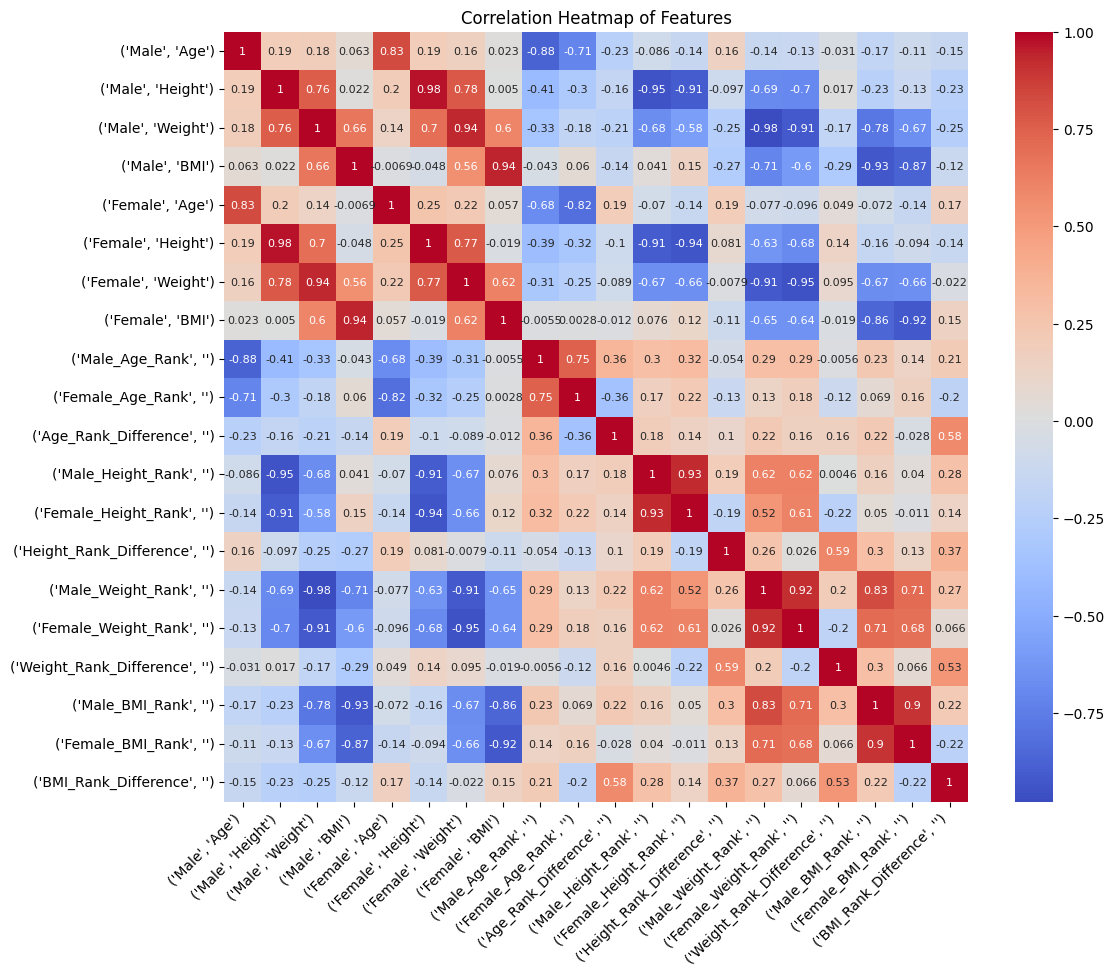

In [60]:
plt.figure(figsize=(12, 10))
sns.heatmap(comparison.corr(), annot=True, annot_kws={'size': 8}, cmap='coolwarm',  xticklabels=comparison.columns, yticklabels=comparison.columns)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [61]:
# Selecting features

features = comparison[[
    ('Age_Rank_Difference', ''),
    ('Height_Rank_Difference', ''),
    ('Weight_Rank_Difference', ''),
    ('BMI_Rank_Difference', ''),
]]
features

Age_Rank_Difference Height_Rank_Difference  \
                                                               
sport                                                          
Archery                          -1.0                   -3.0   
Athletics                         5.0                    1.0   
Badminton                       -12.0                    4.0   
Basketball                        3.0                    0.0   
Beach Volleyball                  1.0                    0.0   
Boxing                           17.0                   13.0   
Canoeing                          5.0                    1.0   
Cycling                           9.0                   -1.0   
Diving                            0.0                   -1.0   
Equestrianism                     0.0                    5.0   
Fencing                           1.0                    0.0   
Football                          7.0                   -4.0   
Golf                             -5.0                    3.0   
Gymnastics                       -4.0                    0.0   
Handball                          2.0                    0.0   
Hockey                           -3.0                   -3.0   
Judo                              5.0                    0.0   
Modern Pentathlon                -4.0                    1.0   
Rowing                            4.0                    2.0   
Rugby Sevens                      7.0                   -9.0   
Sailing                          -4.0                    1.0   
Shooting                          0.0                   -2.0   
Swimming                          0.0                   -1.0   
Table Tennis                      0.0                    0.0   
Taekwondo                        -2.0                    0.0   
Tennis                          -14.0                    1.0   
Trampolining                      5.0                    1.0   
Triathlon                         5.0                   -6.0   
Volleyball                       -5.0                    0.0   
Water Polo                      -17.0                   -2.0   
Weightlifting                    -3.0                    0.0   
Wrestling                        -2.0                   -1.0   

                  Weight_Rank_Difference BMI_Rank_Difference  
                                                              
sport                                                         
Archery                              0.0                -1.0  
Athletics                           -4.0                -3.0  
Badminton                            2.0                 1.0  
Basketball                           0.0                -1.0  
Beach Volleyball                     0.0                -3.0  
Boxing                              11.0                15.0  
Canoeing                             0.0                 4.0  
Cycling                              0.0                 7.0  
Diving                               1.0                -2.0  
Equestrianism                        1.0                -1.0  
Fencing                              1.0                -4.0  
Football                             3.0                 8.0  
Golf                                 4.0                 0.0  
Gymnastics                           0.0                -4.0  
Handball                            -1.0                -1.0  
Hockey                              -3.0                -1.0  
Judo                                 1.0                 1.0  
Modern Pentathlon                   -4.0                -1.0  
Rowing                               2.0                 0.0  
Rugby Sevens                        -5.0                -1.0  
Sailing                              6.0                 1.0  
Shooting                            -3.0                 3.0  
Swimming                            -1.0                -4.0  
Table Tennis                        -1.0                 1.0  
Taekwondo                            1.0                 1.0  
Tennis       

In [62]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.15238786, -0.85714286,  0.        , -0.24759378],
       [ 0.76193932,  0.28571429, -1.09630194, -0.74278135],
       [-1.82865436,  1.14285714,  0.54815097,  0.24759378],
       [ 0.45716359,  0.        ,  0.        , -0.24759378],
       [ 0.15238786,  0.        ,  0.        , -0.74278135],
       [ 2.59059368,  3.71428571,  3.01483032,  3.71390676],
       [ 0.76193932,  0.28571429,  0.        ,  0.99037514],
       [ 1.37149077, -0.28571429,  0.        ,  1.73315649],
       [ 0.        , -0.28571429,  0.27407548, -0.49518757],
       [ 0.        ,  1.42857143,  0.27407548, -0.24759378],
       [ 0.15238786,  0.        ,  0.27407548, -0.99037514],
       [ 1.06671504, -1.14285714,  0.82222645,  1.98075027],
       [-0.76193932,  0.85714286,  1.09630194,  0.        ],
       [-0.60955145,  0.        ,  0.        , -0.99037514],
       [ 0.30477573,  0.        , -0.27407548, -0.24759378],
       [-0.45716359, -0.85714286, -0.82222645, -0.24759378],
       [ 0.76193932,  0.

In [63]:
#Applying DBSCAN model

In [64]:
eps=2.5
min_samples=2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)

In [65]:
print(f"DBSCAN parameters: eps={eps}, min_samples={min_samples}")
print(f"Number of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Number of outliers: {list(clusters).count(-1)}")

DBSCAN parameters: eps=2.5, min_samples=2
Number of clusters found: 1
Number of outliers: 1


In [66]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

In [67]:
feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance_pc1': pca.components_[0],
    'importance_pc2': pca.components_[1]
})
feature_importance = feature_importance.sort_values('importance_pc1', key=abs, ascending=False)

print("Feature importance:")
print(feature_importance)

Feature importance:
                      feature  importance_pc1  importance_pc2
3     (BMI_Rank_Difference, )        0.573102        0.294677
2  (Weight_Rank_Difference, )        0.539975       -0.380083
1  (Height_Rank_Difference, )        0.479061       -0.504662
0     (Age_Rank_Difference, )        0.387920        0.716951


In [68]:
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6682414539920984


In [69]:
#Checking for eps, min_samples variable optimization for better silhoutte scores

In [70]:
eps_range = np.arange(1.5, 5.1, 0.1)
min_samples_range = range(1, 11)  # Extended range to include 5

best_score = -1
best_params = {}
results = []



for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_features)
        
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters >= 1:
            score = silhouette_score(scaled_features, clusters)
        else:
            score = -1
        
        results.append((eps, min_samples, score, n_clusters))
        
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

results.sort(key=lambda x: x[2], reverse=True)

print("Top 5 parameter combinations:")
for eps, min_samples, score, n_clusters in results[:5]:
    print(f"eps: {eps:.2f}, min_samples: {min_samples}, score: {score:.3f}, clusters: {n_clusters}")

print(f"\nBest parameters: {best_params}")
print(f"Best silhouette score: {best_score:.3f}")

Top 5 parameter combinations:
eps: 2.50, min_samples: 1, score: 0.668, clusters: 2
eps: 2.50, min_samples: 2, score: 0.668, clusters: 1
eps: 2.50, min_samples: 3, score: 0.668, clusters: 1
eps: 2.50, min_samples: 4, score: 0.668, clusters: 1
eps: 2.50, min_samples: 5, score: 0.668, clusters: 1

Best parameters: {'eps': 2.500000000000001, 'min_samples': 1}
Best silhouette score: 0.668


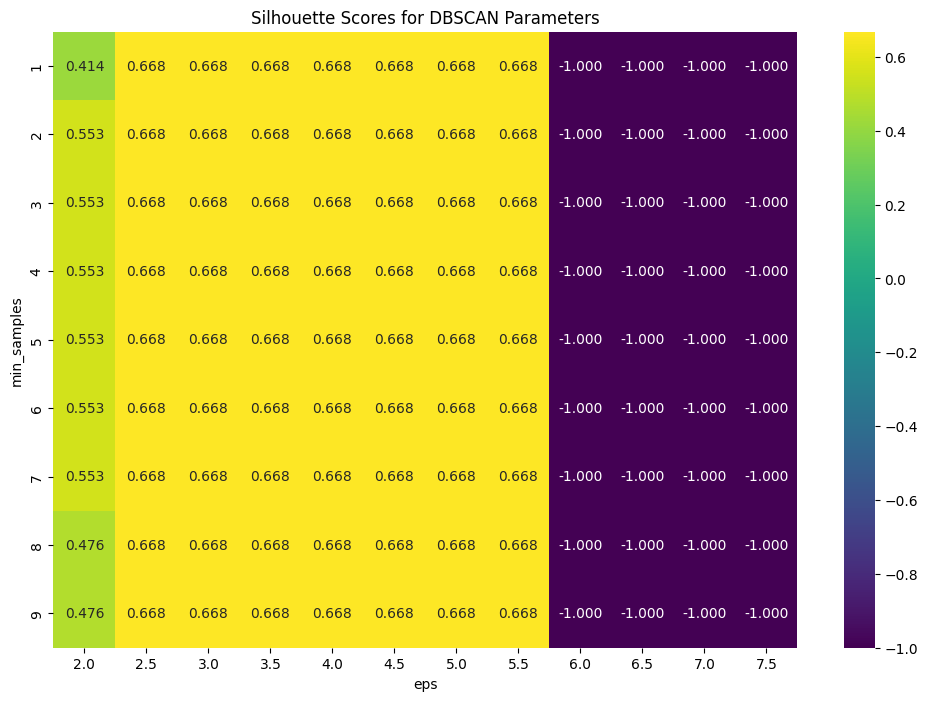

In [71]:
eps_range = np.arange(2, 8, 0.5)
min_samples_range = range(1, 10)

scores = []
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_features)
        if len(set(labels)) > 1:  # More than one cluster
            score = silhouette_score(scaled_features, labels)
        else:
            score = -1
        scores.append((eps, min_samples, score))

scores_df = pd.DataFrame(scores, columns=['eps', 'min_samples', 'silhouette'])
pivot_df = scores_df.pivot(index='min_samples', columns='eps', values='silhouette')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt='.3f', cmap='viridis')
plt.title('Silhouette Scores for DBSCAN Parameters')
plt.show()

In [72]:
#Clustering plot

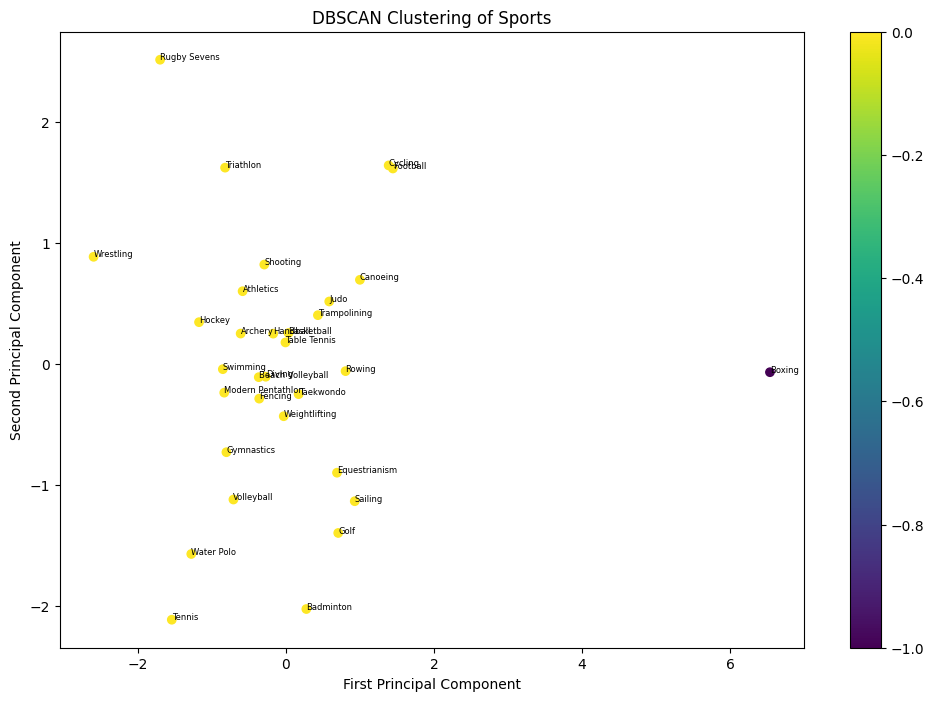

In [73]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)

for i, sport in enumerate(comparison.index):
    plt.annotate(sport, (pca_result[i, 0], pca_result[i, 1]), fontsize=6)

plt.title('DBSCAN Clustering of Sports')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [74]:
#Applying Isolation Forest Model

In [75]:
iso_forest = IsolationForest(contamination=0.03, random_state=100, n_estimators=500)
iso_forest_labels = iso_forest.fit_predict(scaled_features)
iso_forest_outliers = comparison.index[iso_forest_labels == -1].tolist()

In [76]:
iso_forest_outliers

['Boxing']

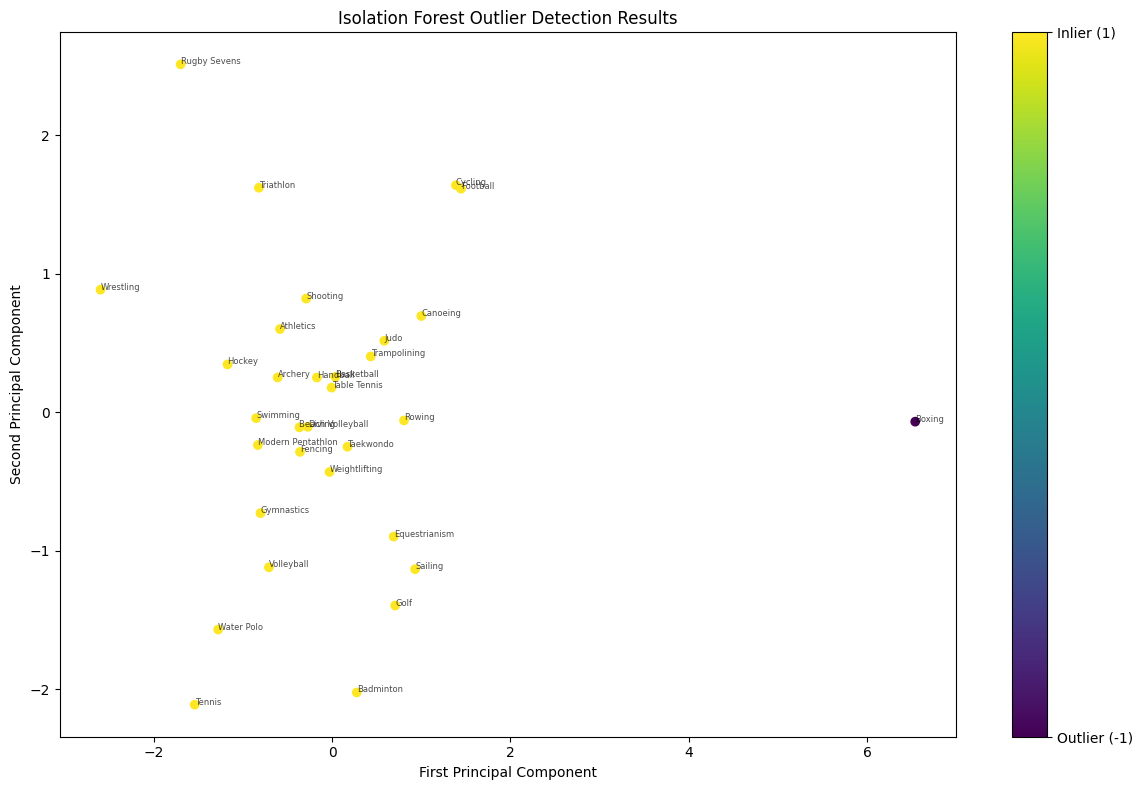

In [77]:
plt.figure(figsize=(12, 8))


colors = iso_forest_labels 

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, cmap='viridis', marker='o')


for i, sport in enumerate(comparison.index):
    plt.annotate(sport, (pca_result[i, 0], pca_result[i, 1]), fontsize=6, alpha=0.7)

plt.title('Isolation Forest Outlier Detection Results')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


colorbar = plt.colorbar(scatter)
colorbar.set_ticks([-1, 1])
colorbar.set_ticklabels(['Outlier (-1)', 'Inlier (1)'])

plt.tight_layout()
plt.show()

In [78]:
# n_estimators and random_state did not affect the number of outliers in this analysis

In [79]:
contamination_range = np.arange(0.01, 0.1, 0.01)
n_estimators_range = [50, 100, 200, 300]
random_state_range = [50, 0, 100, 500]  

results = []

for cont in contamination_range:
    for n_est in n_estimators_range:
        for rs in random_state_range: 
            iso_forest = IsolationForest(contamination=cont, n_estimators=n_est, random_state=rs)
            labels = iso_forest.fit_predict(scaled_features)
            n_outliers = sum(labels == -1)
            results.append((cont, n_est, rs, n_outliers))


results_df = pd.DataFrame(results, columns=['Contamination', 'N_Estimators', 'Random_State', 'N_Outliers'])
print(results_df)

     Contamination  N_Estimators  Random_State  N_Outliers
0             0.01            50            50           1
1             0.01            50             0           1
2             0.01            50           100           1
3             0.01            50           500           1
4             0.01           100            50           1
5             0.01           100             0           1
6             0.01           100           100           1
7             0.01           100           500           1
8             0.01           200            50           1
9             0.01           200             0           1
10            0.01           200           100           1
11            0.01           200           500           1
12            0.01           300            50           1
13            0.01           300             0           1
14            0.01           300           100           1
15            0.01           300           500          

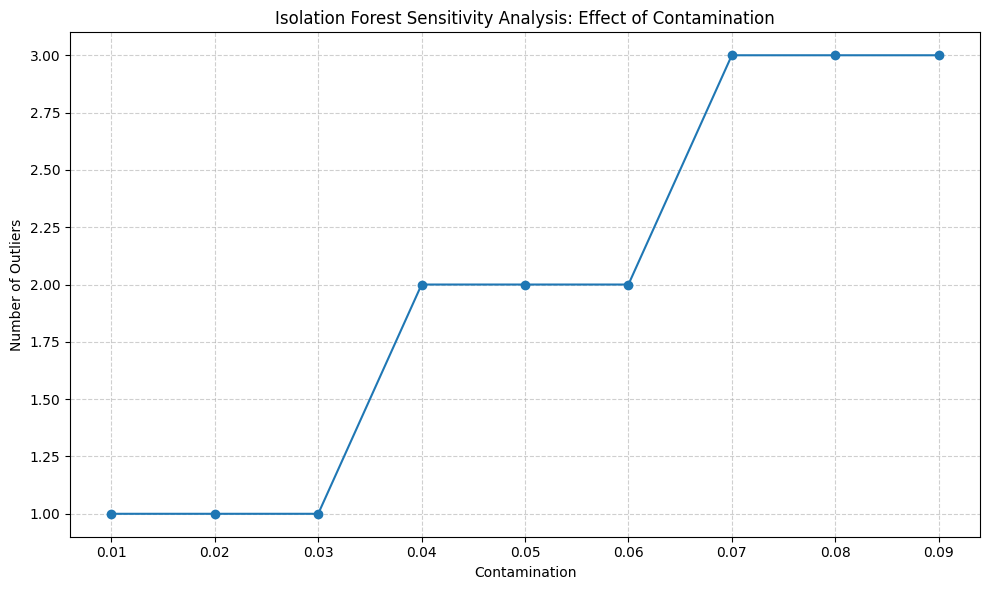

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(contamination_range, results_df.groupby('Contamination')['N_Outliers'].first(), marker='o')
plt.xlabel('Contamination')
plt.ylabel('Number of Outliers')
plt.title('Isolation Forest Sensitivity Analysis: Effect of Contamination')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [85]:
# Calculating z scores
selected_features = ['Age_Rank_Difference', 'Height_Rank_Difference', 'Weight_Rank_Difference', 'BMI_Rank_Difference']
temp_df = comparison[selected_features].copy()
temp_df.columns = temp_df.columns.droplevel(1)
z_scores = zscore(temp_df)
z_scores_df = pd.DataFrame(z_scores, columns=temp_df.columns, index=temp_df.index)

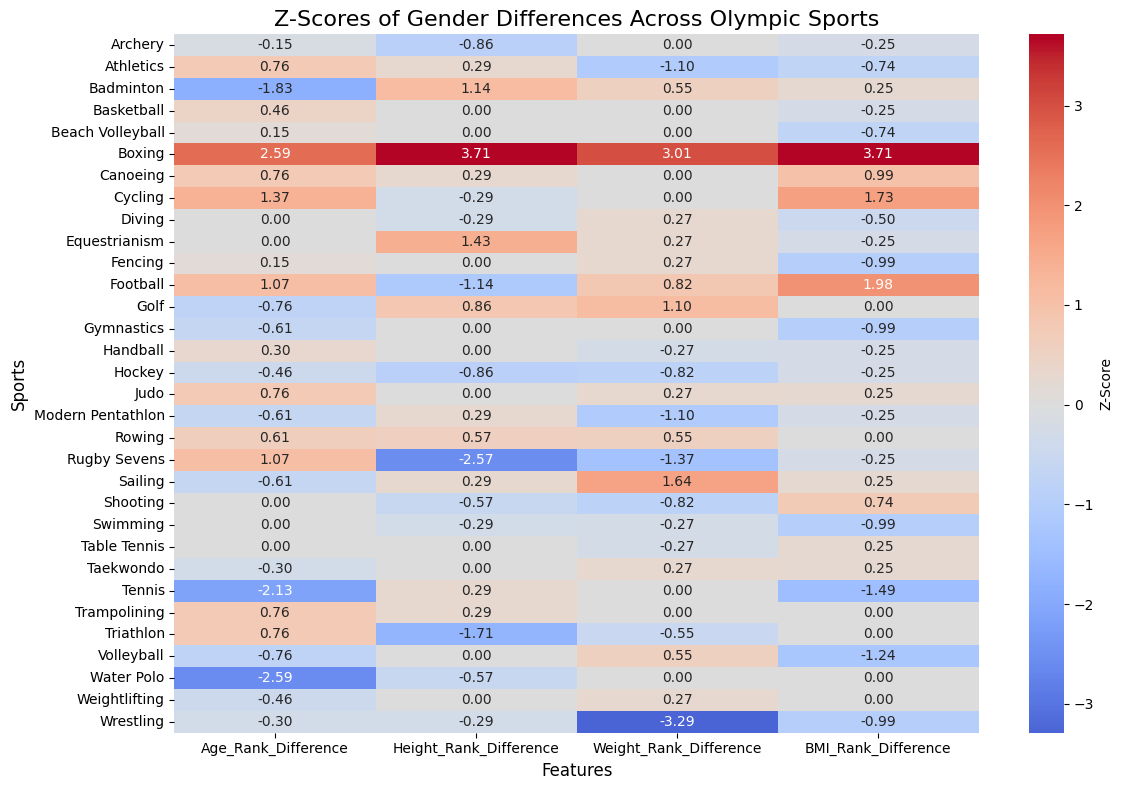

In [82]:
plt.figure(figsize=(12, 8))
sns.heatmap(z_scores_df, cmap="coolwarm", center=0, annot=True, fmt=".2f", cbar_kws={'label': 'Z-Score'})

plt.title("Z-Scores of Gender Differences Across Olympic Sports", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Sports", fontsize=12)
plt.tight_layout()
plt.show()